In [1]:
# %pip install pd
# %pip install matplotlib
# %pip install plotly
# %pip install numpy
# %pip install requests
# %pip install seaborn
# %pip install torch

In [2]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objects as go
import requests
import scipy
import seaborn as sns

import random
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import numpy as numpy

from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from os import sep
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.metrics import confusion_matrix as confusion_matrix
# Start writing code here...

# 1   Load data

In [3]:
PATH_DATA_RAW = 'data_fitness' + sep + 'raw' + sep
original = pd.read_csv(PATH_DATA_RAW + 'fitness analysis.csv')
pd.DataFrame()

""


In [4]:
original

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,2019/07/04 5:43:35 AM GMT+5:30,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,2019/07/04 5:44:29 AM GMT+5:30,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2019/07/09 7:46:49 PM GMT+5:30,Kousi,Female,40 and above,3,Perfect,1 to 2 times a week,I don't have enough time,Walking or jogging,Alone,Evening,30 minutes,Not always,I have a balanced diet,4,Yes,Yes,I want to be flexible
541,2019/07/09 8:20:48 PM GMT+5:30,Dhanuja,Female,40 and above,1,Average,3 to 4 times a week,I exercise regularly with no barriers,Walking or jogging;Gym;Swimming,I don't really exercise,Early morning,2 hours,Yes,Lack of time,3,Yes,Yes,I want to be fit;I want to relieve stress
542,2019/07/12 11:22:18 AM GMT+5:30,Abhinaya V,Female,19 to 25,4,Average,1 to 2 times a week,I can't stay motivated,Walking or jogging;Yoga,Alone,Early morning,30 minutes,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to lose weight;I want to be flexible
543,2019/07/15 1:48:25 PM GMT+5:30,Vishnu S,Male,19 to 25,3,Good,3 to 4 times a week,I don't really enjoy exercising,Walking or jogging,Alone,Evening,30 minutes,Not always,Temptation and cravings,3,Yes,No,I want to relieve stress


# 2   Data treatment

Good         220
Average      195
Unfit         54
Very good     53
Perfect       23
Name: How do you describe your current level of fitness ?, dtype: int64

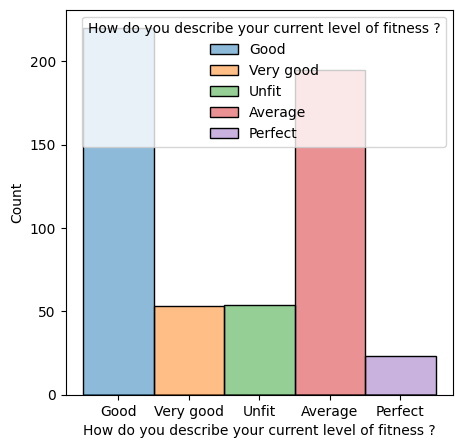

In [5]:
plt.figure(figsize=(5,5))
sns.histplot(data = original, x = 'How do you describe your current level of fitness ?', hue = 'How do you describe your current level of fitness ?')
original['How do you describe your current level of fitness ?'].value_counts()

## Timestamp

In [6]:
edit1 = original.drop(['Timestamp'], axis=1)

## Your name

In [7]:
edit3 = edit1.drop(['Your name '], axis=1)

## PREDICT: How do you describe your current level of fitness?

In [8]:
edit3['How do you describe your current level of fitness ?'].value_counts()

Good         220
Average      195
Unfit         54
Very good     53
Perfect       23
Name: How do you describe your current level of fitness ?, dtype: int64

In [9]:
edit3 = edit3.replace({'How do you describe your current level of fitness ?': {"Unfit": 1, "Average": 1, "Good": 2, "Very good": 3, "Perfect": 3}})
edit3['How do you describe your current level of fitness ?'].value_counts()


1    249
2    220
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

## Your gender

In [10]:
edit3['Your gender '].value_counts()

Female    302
Male      243
Name: Your gender , dtype: int64

In [11]:
edit3 = edit3.replace({'Your gender ': {"Female": 0, "Male": 1}})
edit3['Your gender '].value_counts()

0    302
1    243
Name: Your gender , dtype: int64

## Your age

In [12]:
edit3['Your age '].value_counts()

19 to 25        236
15 to 18        167
40 and above     85
30 to 40         37
26 to 30         20
Name: Your age , dtype: int64

In [13]:
edit3 = edit3.replace({'Your age ': {"19 to 25": 0, "15 to 18": 1, "40 and above": 2, "30 to 40": 3, "26 to 30": 4}})
edit3['Your age '].value_counts()

0    236
1    167
2     85
3     37
4     20
Name: Your age , dtype: int64

## How often do you exercise?

In [14]:
edit3['How often do you exercise?'].value_counts()

1 to 2 times a week    148
Never                  124
2 to 3 times a week     78
3 to 4 times a week     77
Everyday                69
5 to 6 times a week     49
Name: How often do you exercise?, dtype: int64

In [15]:
edit3 = edit3.replace({'How often do you exercise?': {"1 to 2 times a week": 0, "Never": 1, "2 to 3 times a week": 2, "3 to 4 times a week": 3, "Everyday": 4, "5 to 6 times a week": 5}})
edit3['How often do you exercise?'].value_counts()

0    148
1    124
2     78
3     77
4     69
5     49
Name: How often do you exercise?, dtype: int64

## What barriers, if any, prevent you from exercising more regularly?

In [16]:
edit3['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'].value_counts()

I don't have enough time                                                                                       160
I can't stay motivated                                                                                          74
I exercise regularly with no barriers                                                                           60
I don't have enough time;I can't stay motivated                                                                 52
I'll become too tired                                                                                           42
I don't really enjoy exercising                                                                                 25
I don't have enough time;I'll become too tired                                                                  25
I have an injury                                                                                                12
I don't have enough time;I can't stay motivated;I'll become too tired           

In [17]:
edit3 = edit3.drop(['What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)'], axis=1)

## What form(s) of exercise do you currently participate in ?

In [18]:
edit3['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'].value_counts()

Walking or jogging                                                             153
I don't really exercise                                                         77
Gym                                                                             44
Walking or jogging;Yoga                                                         26
Walking or jogging;Gym                                                          26
Team sport                                                                      26
Walking or jogging;Team sport                                                   25
Yoga                                                                            25
Walking or jogging;Gym;Lifting weights                                          13
Walking or jogging;I don't really exercise                                      10
Gym;Team sport                                                                   9
Zumba dance                                                                      9
Walk

In [19]:
edit3 = edit3.drop(['What form(s) of exercise do you currently participate in ?                        (Please select all that apply)'], axis=1)

## Do you exercise ___________ ?

In [20]:
edit3['Do you exercise ___________ ?'].value_counts()

Alone                         289
I don't really exercise        89
With a friend                  85
With a group                   66
Within a class environment     16
Name: Do you exercise ___________ ?, dtype: int64

In [21]:
edit3 = edit3.replace({'Do you exercise ___________ ?': {"Alone": 0, "I don't really exercise": 1, "With a friend": 2, "With a group": 3, "Within a class environment": 4}})
edit3['Do you exercise ___________ ?'].value_counts()

0    289
1     89
2     85
3     66
4     16
Name: Do you exercise ___________ ?, dtype: int64

## What time if the day do you prefer to exercise?

In [22]:
edit3['What time if the day do you prefer to exercise?'].value_counts()

Early morning    300
Evening          235
Afternoon         10
Name: What time if the day do you prefer to exercise?, dtype: int64

In [23]:
edit3 = edit3.replace({'What time if the day do you prefer to exercise?': {"Early morning": 0, "Evening": 1, "Afternoon": 2}})
edit3['What time if the day do you prefer to exercise?'].value_counts()

0    300
1    235
2     10
Name: What time if the day do you prefer to exercise?, dtype: int64

## How long do you spend exercising per day ?

In [24]:
edit3['How long do you spend exercising per day ?'].value_counts()

30 minutes                 203
1 hour                     167
I don't really exercise    105
2 hours                     64
3 hours and above            6
Name: How long do you spend exercising per day ?, dtype: int64

In [25]:
edit3 = edit3.replace({'How long do you spend exercising per day ?': {"30 minutes": 0, "1 hour": 1, "I don't really exercise": 2, "2 hours": 3, "3 hours and above": 4}})
edit3['How long do you spend exercising per day ?'].value_counts()

0    203
1    167
2    105
3     64
4      6
Name: How long do you spend exercising per day ?, dtype: int64

## Would you say you eat a healthy balanced diet ?

In [26]:
edit3['Would you say you eat a healthy balanced diet ?'].value_counts()

Not always    327
Yes           115
No            103
Name: Would you say you eat a healthy balanced diet ?, dtype: int64

In [27]:
edit3 = edit3.replace({'Would you say you eat a healthy balanced diet ?': {"Not always": 0, "Yes": 1, "No": 2, "2 hours": 3}})
edit3['Would you say you eat a healthy balanced diet ?'].value_counts()

0    327
1    115
2    103
Name: Would you say you eat a healthy balanced diet ?, dtype: int64

## What prevents you from eating a healthy balanced diet, If any?

In [28]:
edit3['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'].value_counts()

Temptation and cravings                                                  210
Lack of time                                                              88
Ease of access to fast food;Temptation and cravings                       76
Ease of access to fast food                                               56
I have a balanced diet                                                    42
Lack of time;Temptation and cravings                                      15
Cost                                                                      13
Lack of time;Ease of access to fast food;Temptation and cravings          10
Lack of time;Ease of access to fast food                                   9
Cost;Ease of access to fast food                                           6
Lack of time;Cost                                                          5
Cost;Ease of access to fast food;Temptation and cravings                   2
Lack of time;Cost;Ease of access to fast food;Temptation and cravings      2

In [29]:
edit3 = edit3.drop(['What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)'], axis=1)

## Have you ever recommended your friends to follow a fitness routine?

In [30]:
edit3['Have you ever recommended your friends to follow a fitness routine?'].value_counts()

Yes    351
No     194
Name: Have you ever recommended your friends to follow a fitness routine?, dtype: int64

In [31]:
edit3 = edit3.replace({'Have you ever recommended your friends to follow a fitness routine?': {"Yes": 0, "No": 1}})
edit3['Have you ever recommended your friends to follow a fitness routine?'].value_counts()

0    351
1    194
Name: Have you ever recommended your friends to follow a fitness routine?, dtype: int64

## Have you ever purchased a fitness equipment?

In [32]:
edit3['Have you ever purchased a fitness equipment?'].value_counts()

No     340
Yes    205
Name: Have you ever purchased a fitness equipment?, dtype: int64

In [33]:
edit3 = edit3.replace({'Have you ever purchased a fitness equipment?': {"Yes": 0, "No": 1}})
edit3['Have you ever purchased a fitness equipment?'].value_counts()

1    340
0    205
Name: Have you ever purchased a fitness equipment?, dtype: int64

## What motivates you to exercise?

In [34]:
edit3['What motivates you to exercise?         (Please select all that applies )'].value_counts()

I want to be fit                                                                                                        88
I want to be fit;I want to lose weight                                                                                  43
I want to lose weight                                                                                                   43
I'm sorry ... I'm not really interested in exercising                                                                   36
I want to relieve stress                                                                                                33
                                                                                                                        ..
I want to be fit;I want to think clearly and I want to play cricket with my grandkids                                    1
I want to increase muscle mass and strength;I want to achieve a sporting goal                                            1
I dont wanna gai

In [35]:
edit3 = edit3.drop(['What motivates you to exercise?         (Please select all that applies )'], axis=1)

## FINAL VALUES

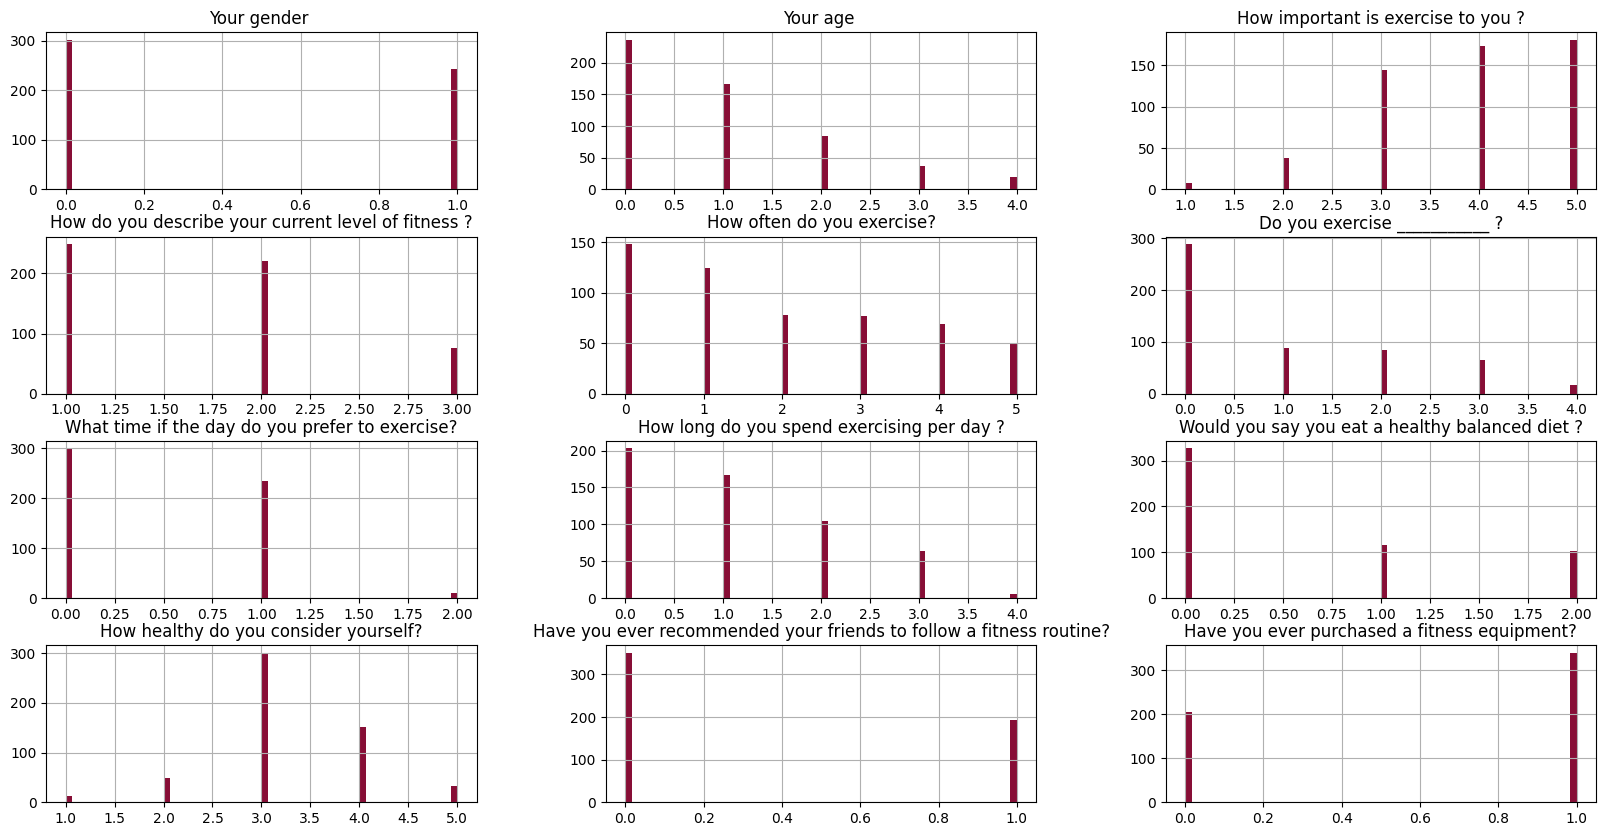

In [36]:
edit3.hist(bins=60, figsize=(20,10), color='#870e36')
plt.show()

1    249
2    220
3     76
Name: How do you describe your current level of fitness ?, dtype: int64

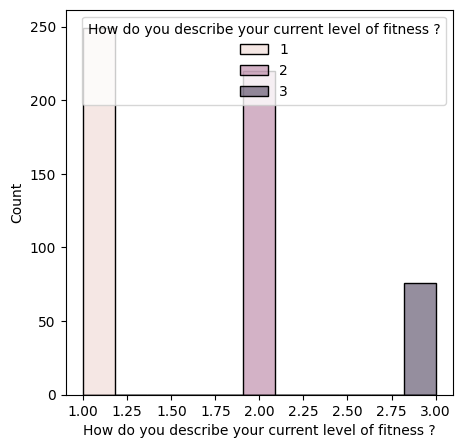

In [37]:
plt.figure(figsize=(5,5))
sns.histplot(data = edit3, x = 'How do you describe your current level of fitness ?', hue = 'How do you describe your current level of fitness ?')
edit3['How do you describe your current level of fitness ?'].value_counts()

C:\Users\ruben\AppData\Local\Temp\ipykernel_15896\1316445711.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype = np.bool)


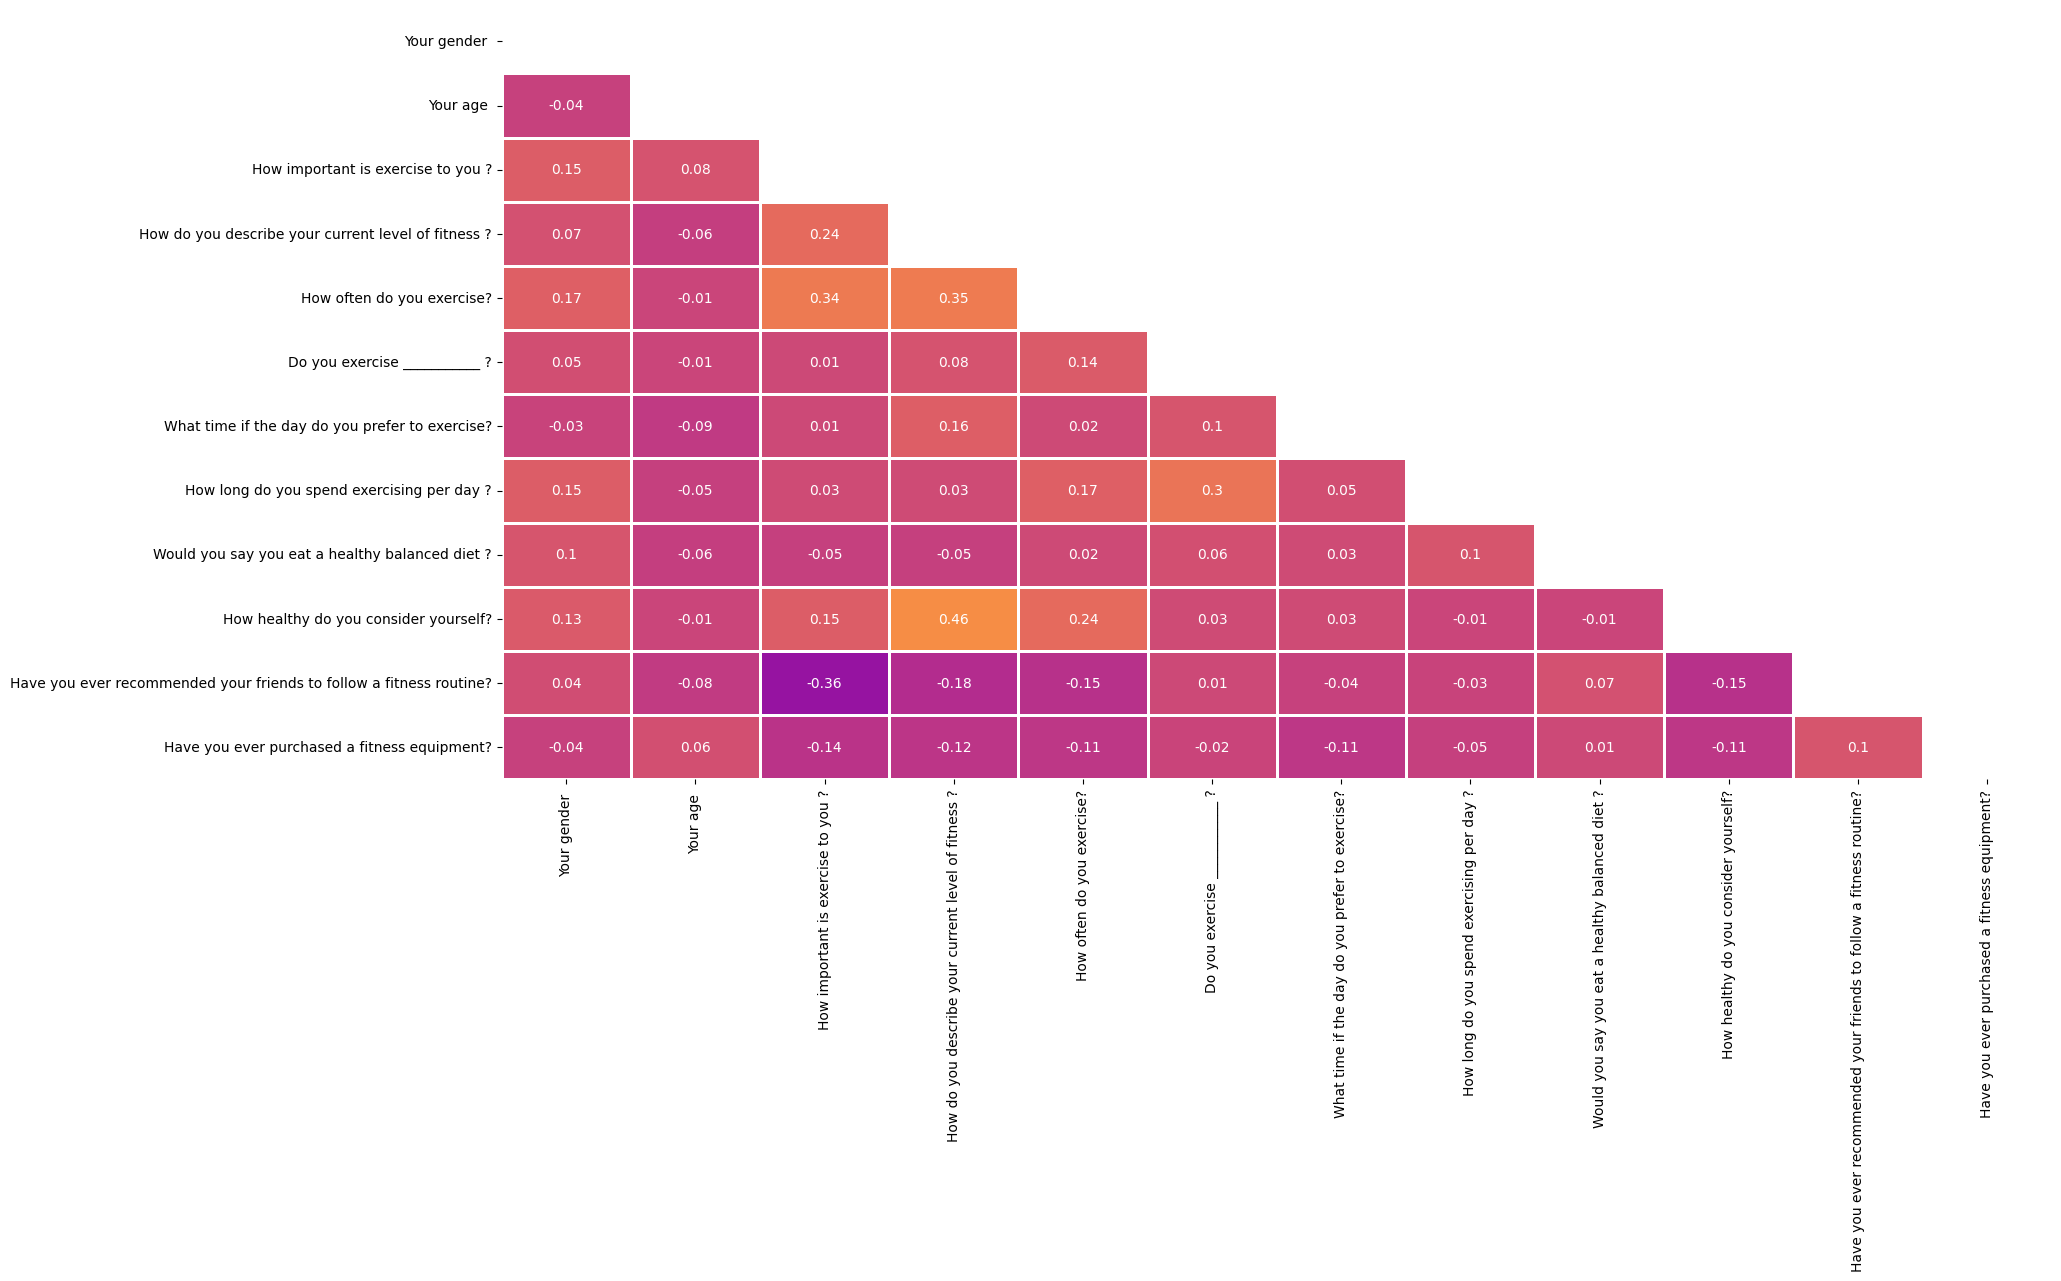

In [38]:
corr_mat = edit3.corr().round(2)
plt.subplots(figsize = (20,10))
mask = np.zeros_like(corr_mat,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,mask = mask,vmin = -1,vmax = 1,center = 0, cmap = 'plasma',square = False,lw = 2,annot = True,cbar = False)
plt.show() 

# 3   Modeling & evaluating

## Logistic Regression

In [39]:
x = edit3.drop(['How do you describe your current level of fitness ?'], axis=1)
y = edit3['How do you describe your current level of fitness ?']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

<AxesSubplot: xlabel='How do you describe your current level of fitness ?', ylabel='Count'>

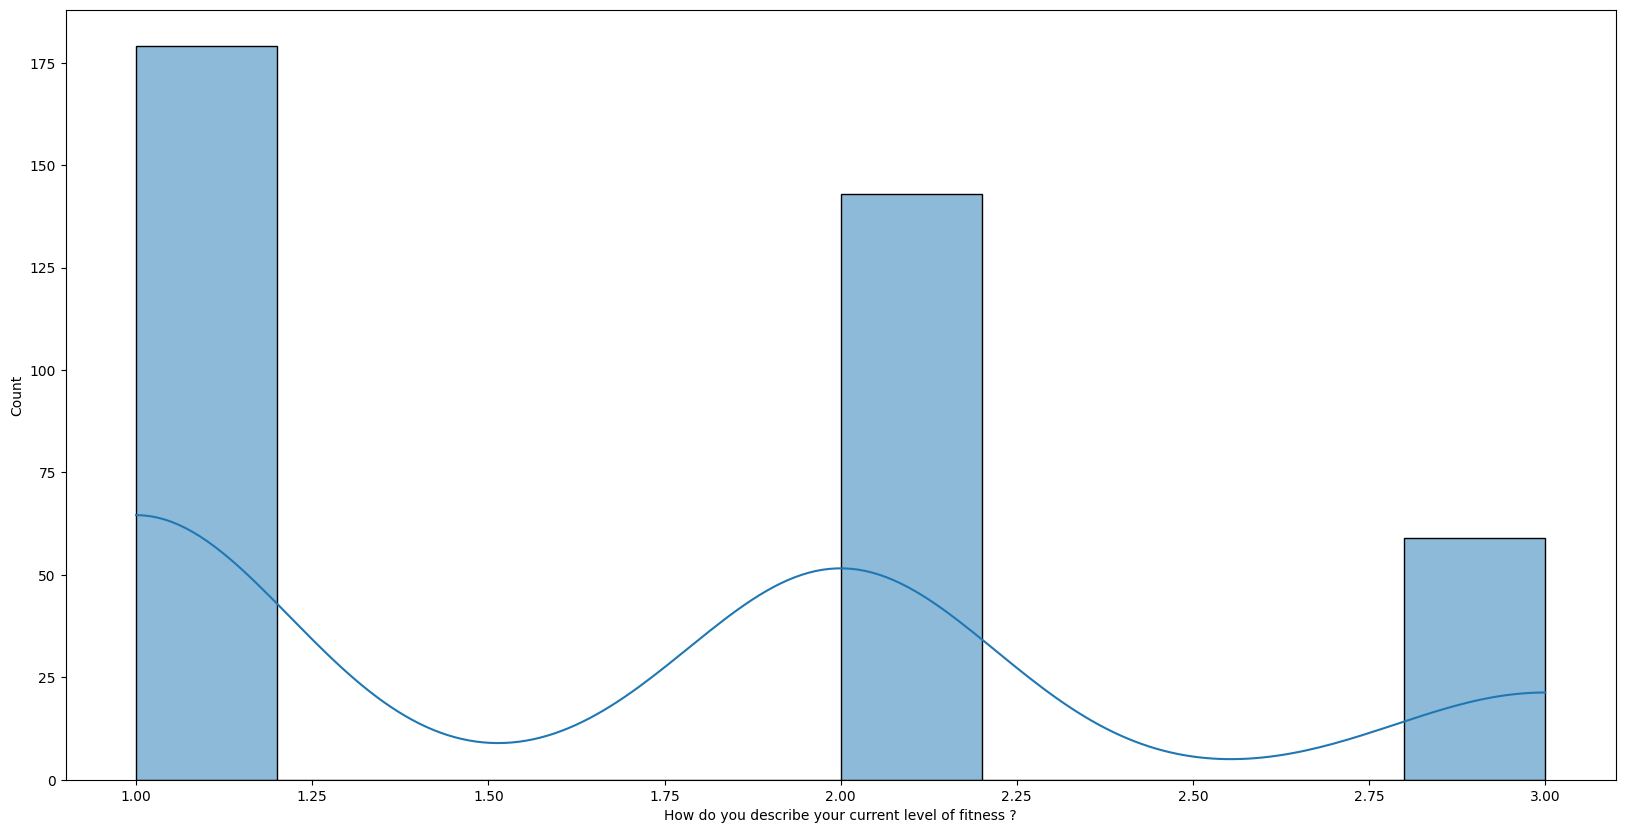

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_train, kde = True)

In [41]:
lr = LogisticRegression(random_state=40)
print(lr.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 40, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [42]:
lr.fit(X_train,y_train)

C:\Users\ruben\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [43]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: {:d}%'.format(int(accuracy * 100)))

Accuracy: 57%


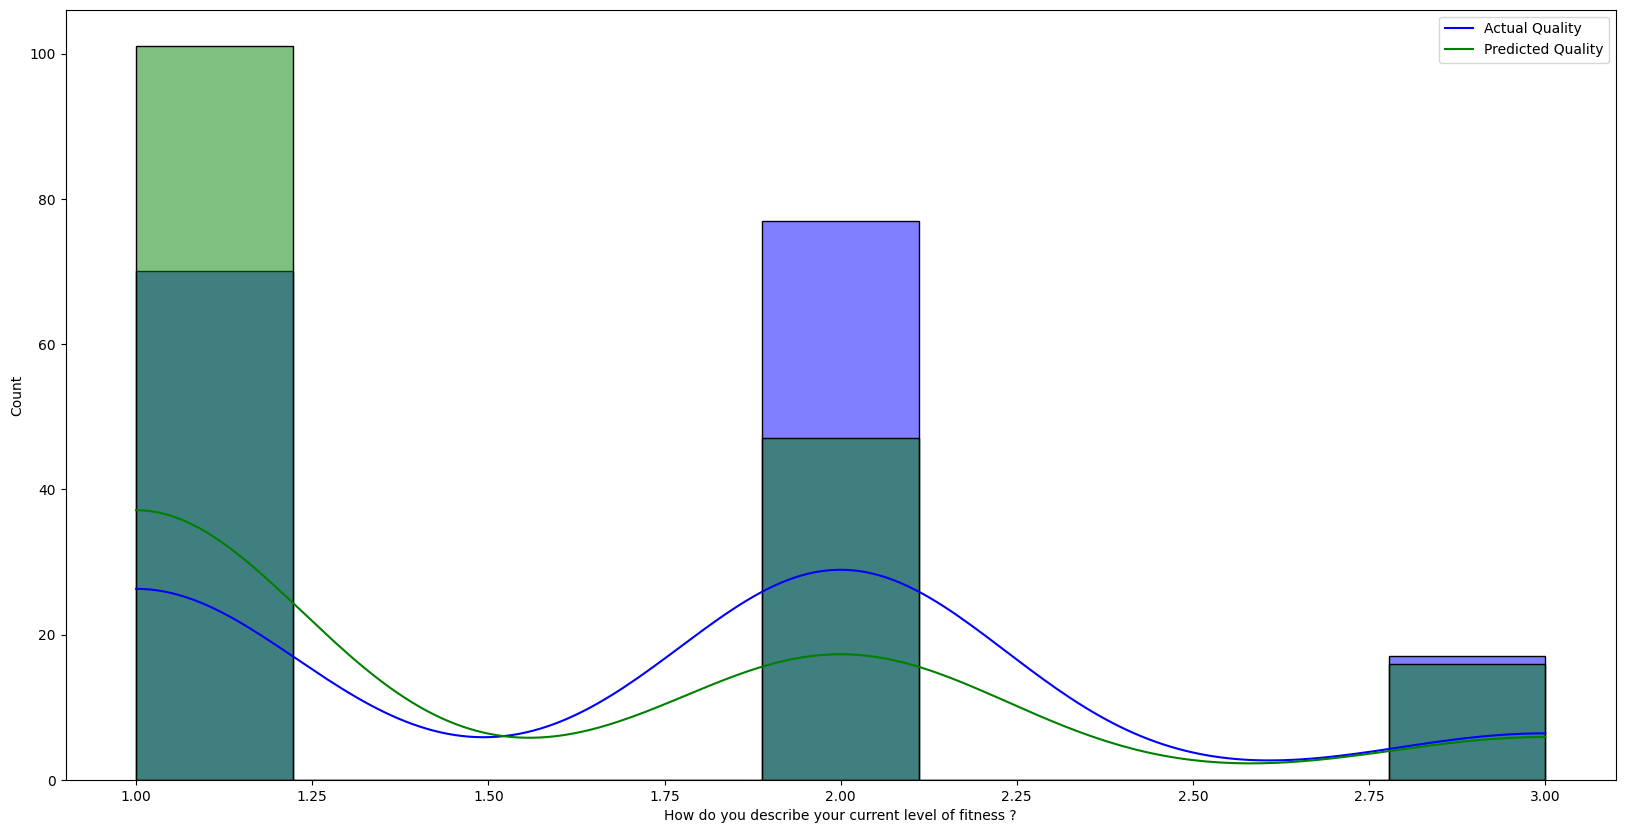

In [44]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='b')
sns.histplot(data = y_pred, kde = True, color='g')
plt.legend(labels=["Actual Quality","Predicted Quality"])

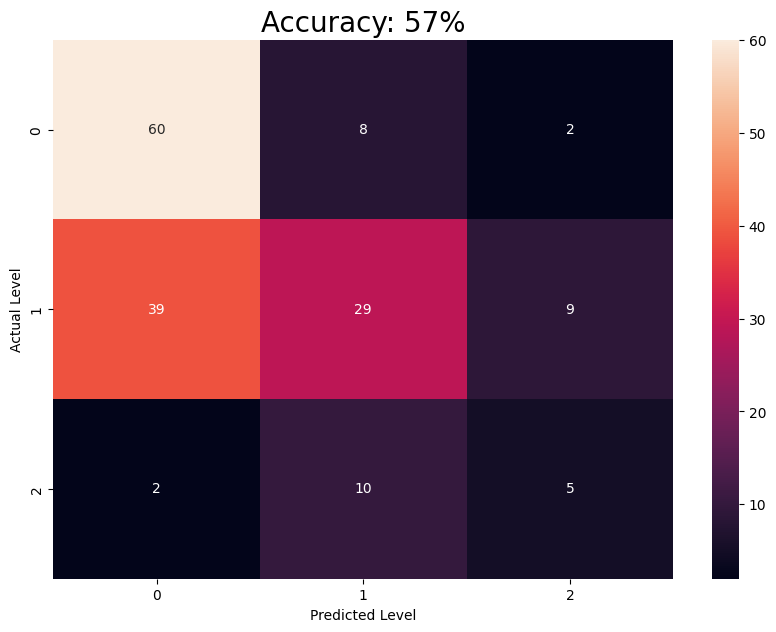

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f")
plt.xlabel('Predicted Level')
plt.ylabel('Actual Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy * 100)), size = 20)
plt.show()

## Decision Tree

In [46]:
dt = DecisionTreeClassifier(criterion='gini',splitter='best')
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy: {:d}%'.format(int(accuracy_dt * 100)))

Accuracy: 55%


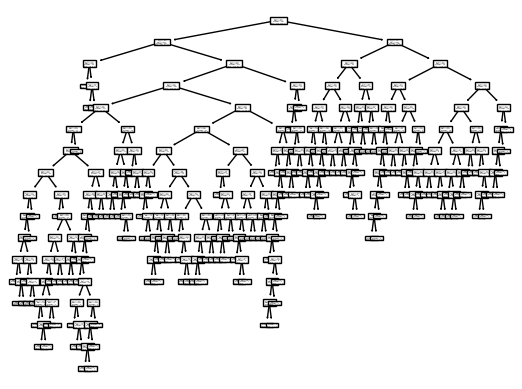

In [48]:
from sklearn import tree

tree.plot_tree(dt)
plt.show()

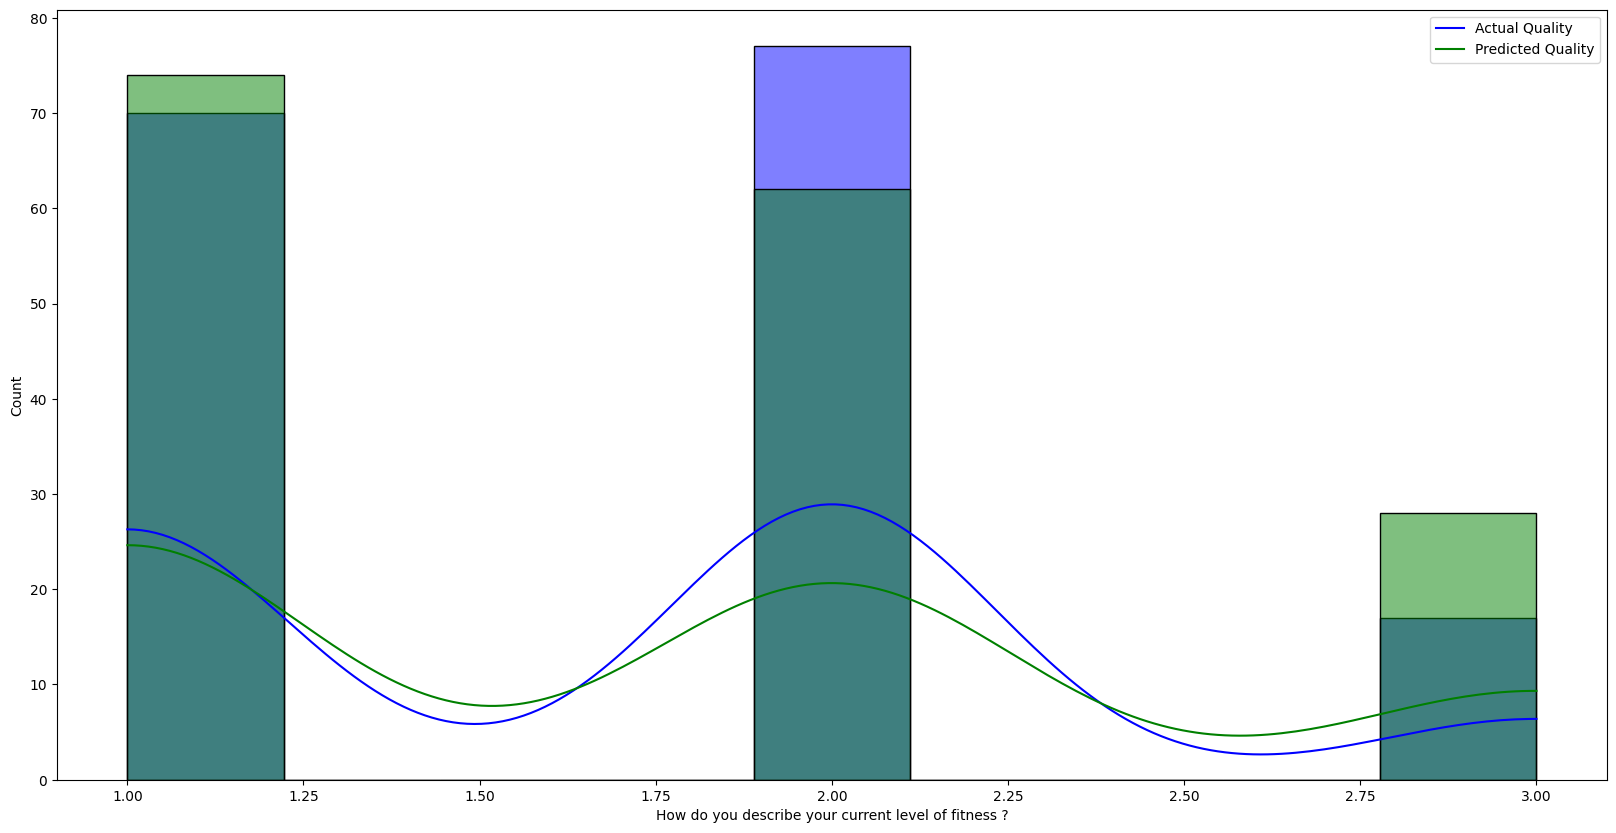

In [49]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='b')
sns.histplot(data = y_pred_dt, kde = True, color='g')
plt.legend(labels=["Actual Quality","Predicted Quality"])

In [50]:
#!pip install dtreeviz
#from dtreeviz.trees import dtreeviz ## it might need to be installed with !pip install dtreeviz
#viz = dtreeviz(edit3, X_train, y_train, target_name="How do you describe your current level of fitness ?", feature_names=column_names)
#viz

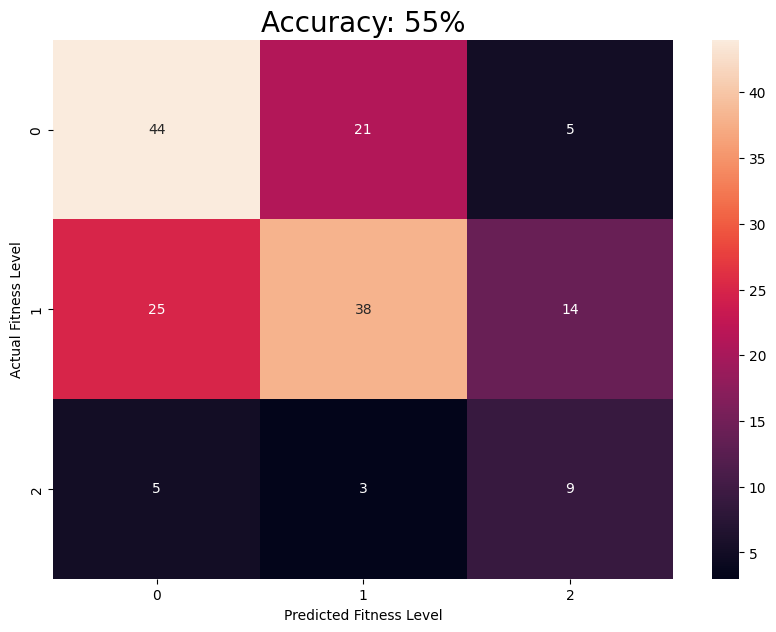

In [51]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt=".0f")
plt.xlabel('Predicted Fitness Level')
plt.ylabel('Actual Fitness Level')
plt.title('Accuracy: {:d}%'.format(int(accuracy_dt * 100)), size = 20)
plt.show()

## Random Forest

In [52]:
rfc = RandomForestClassifier(n_estimators=1000,random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [53]:
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy: {:d}%'.format(int(accuracy_rfc * 100)))

Accuracy: 59%


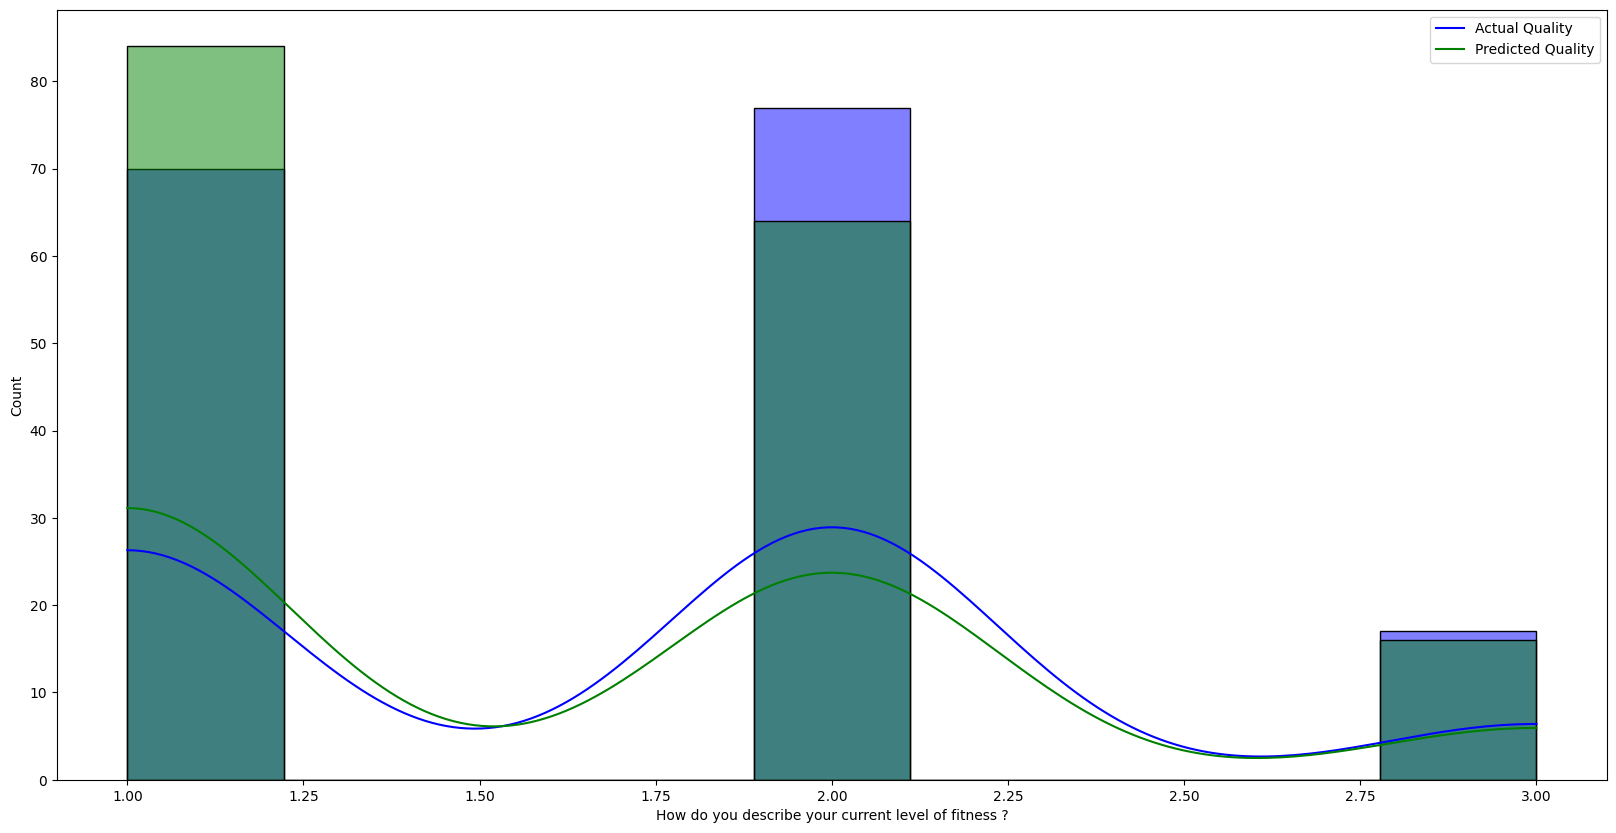

In [54]:
plt.figure(figsize=(20,10))
sns.histplot(data = y_test, kde = True, color='b')
sns.histplot(data = y_pred_rfc, kde = True, color='g')
plt.legend(labels=["Actual Quality","Predicted Quality"])

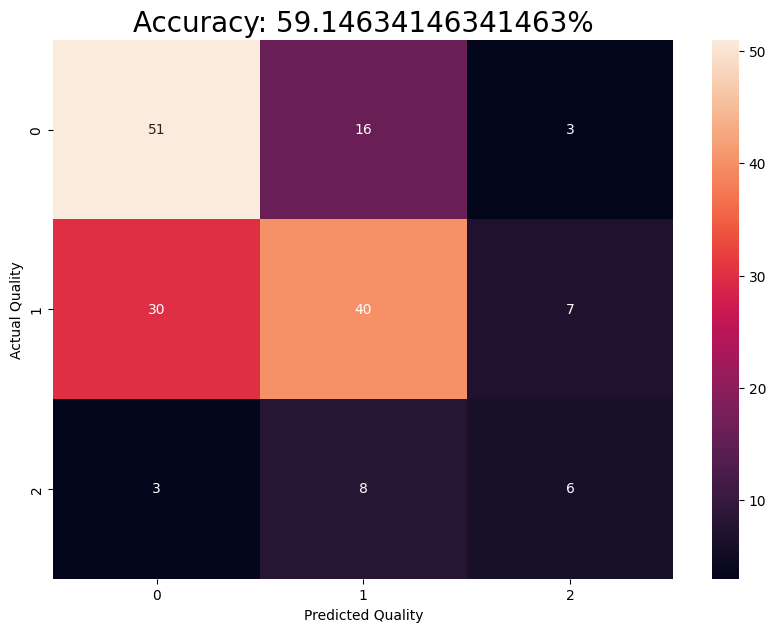

In [55]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, fmt=".0f")
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.title('Accuracy: ' + str(accuracy_rfc * 100) + '%', size = 20)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ccc608f4-1ae9-494c-9e31-f49f802b8ca0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>